In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\FCAI\Banque misr\Weather_aus_cleaned.csv')
#Using AHMED ASHRAF cleaned dataset

In [3]:
df.head()

,Date,Year,Month,Location,States_Territories,States_Territories_Encoded,MinTemp,MaxTemp,Rainfall,Evaporation,...,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
0,12/1/2008,2008,12,Albury,NSW,1,13.4,22.9,0.6,8.0,...,44,W,WNW,0,0,22.0,46.5,1007.40,4.5,19.35
1,12/2/2008,2008,12,Albury,NSW,1,7.4,25.1,0.0,8.0,...,44,NNW,WSW,0,0,13.0,34.5,1009.20,4.5,20.75
2,12/3/2008,2008,12,Albury,NSW,1,12.9,25.7,0.0,8.0,...,46,W,WSW,0,0,22.5,34.0,1008.15,4.5,22.10
3,12/4/2008,2008,12,Albury,NSW,1,9.2,28.0,0.0,8.0,...,24,SE,E,0,0,10.0,30.5,1015.20,4.5,22.30
4,12/5/2008,2008,12,Albury,NSW,1,17.5,32.3,1.0,8.0,...,41,ENE,NW,0,0,13.5,57.5,1008.40,7.5,23.75


In [4]:
df.describe()

,Year,Month,States_Territories_Encoded,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,2012.806111,6.431824,4.402627,12.335514,23.334370,1.539437,5.212249,8.174223,40.170051,0.224363,0.221421,16.848222,58.929034,1016.110156,4.463172,19.491914
std,2.528473,3.475113,2.725359,6.211902,6.913815,3.465153,2.819965,3.058507,12.032588,0.417164,0.415205,6.673117,17.820769,6.422520,2.014469,6.302786
min,2007.000000,1.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000,979.750000,0.000000,-6.300000
25%,2011.000000,3.000000,1.000000,7.800000,18.100000,0.000000,2.800000,6.500000,31.000000,0.000000,0.000000,12.000000,47.500000,1011.850000,3.500000,14.750000
50%,2013.000000,6.000000,5.000000,12.200000,23.000000,0.000000,5.000000,8.800000,39.000000,0.000000,0.000000,16.000000,60.000000,1016.250000,4.500000,19.250000
75%,2015.000000,9.000000,7.000000,17.100000,28.600000,0.800000,7.600000,10.300000,48.000000,0.000000,0.000000,21.500000,72.000000,1020.600000,6.000000,24.250000
max,2017.000000,12.000000,8.000000,23.300000,35.700000,13.200000,10.800000,12.600000,65.000000,1.000000,1.000000,30.500000,88.000000,1027.450000,7.500000,30.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        123710 non-null  object 
 1   Year                        123710 non-null  int64  
 2   Month                       123710 non-null  int64  
 3   Location                    123710 non-null  object 
 4   States_Territories          123710 non-null  object 
 5   States_Territories_Encoded  123710 non-null  int64  
 6   MinTemp                     123710 non-null  float64
 7   MaxTemp                     123710 non-null  float64
 8   Rainfall                    123710 non-null  float64
 9   Evaporation                 123710 non-null  float64
 10  Sunshine                    123710 non-null  float64
 11  WindGustDir                 123710 non-null  object 
 12  WindGustSpeed               123710 non-null  int64  
 13  WindDir9am    

In [7]:
X = df[["Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed", "Humidity", "Pressure", "Cloud", "Temp"]]
y = df["RainTomorrow"]

In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from collections import Counter

In [9]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial class distribution in the training set
print("Original class distribution in training set:", Counter(y_train))

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Apply TomekLinks to undersample the majority class in the resampled set
tl = TomekLinks(sampling_strategy='all', n_jobs=-1)
X_resampled, y_resampled = tl.fit_resample(X_resampled, y_resampled)

# New class distribution after resampling
print("Resampled class distribution in training set:", Counter(y_resampled))

Original class distribution in training set: Counter({0: 76937, 1: 22031})
Resampled class distribution in training set: Counter({0: 76332, 1: 76332})


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     15318
           1       0.89      0.91      0.90     15215

    accuracy                           0.90     30533
   macro avg       0.90      0.90      0.90     30533
weighted avg       0.90      0.90      0.90     30533



In [13]:
from sklearn.metrics import confusion_matrix

y_true = y_test  # Replace with your actual target values
y_pred = rf_classifier.predict(X_test)  # Replace with your predicted target values

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13685  1633]
 [ 1426 13789]]


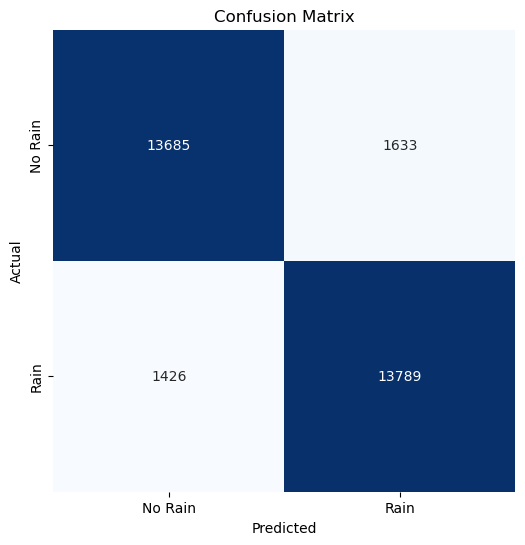

In [14]:
y_true = y_test  # Replace with your actual target values
y_pred = rf_classifier.predict(X_test)  # Replace with your predicted target values

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the model on the resampled training data
logistic_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)

# Evaluate the model
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mtx)

# Print a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[11860  3458]
 [ 3504 11711]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77     15318
           1       0.77      0.77      0.77     15215

    accuracy                           0.77     30533
   macro avg       0.77      0.77      0.77     30533
weighted avg       0.77      0.77      0.77     30533



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


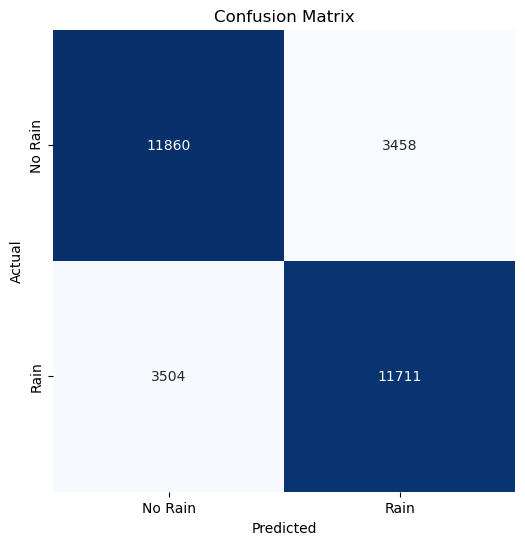

In [16]:
y_true = y_test  # Replace with your actual target values
y_pred = logistic_classifier.predict(X_test)  # Replace with your predicted target values

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled training data
tree_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mtx)

# Print a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[15318     0]
 [    0 15215]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15318
           1       1.00      1.00      1.00     15215

    accuracy                           1.00     30533
   macro avg       1.00      1.00      1.00     30533
weighted avg       1.00      1.00      1.00     30533



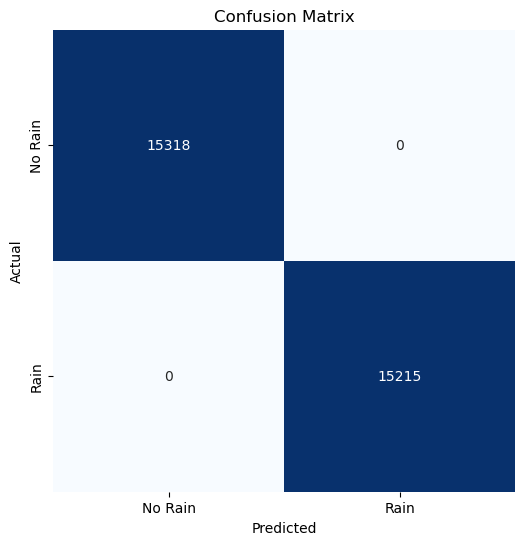

In [18]:
y_true = y_test  # Replace with your actual target values
y_pred = tree_classifier.predict(X_test)  # Replace with your predicted target values

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model on the resampled training data
xgb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mtx)

# Print a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[14429   889]
 [ 1872 13343]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     15318
           1       0.94      0.88      0.91     15215

    accuracy                           0.91     30533
   macro avg       0.91      0.91      0.91     30533
weighted avg       0.91      0.91      0.91     30533



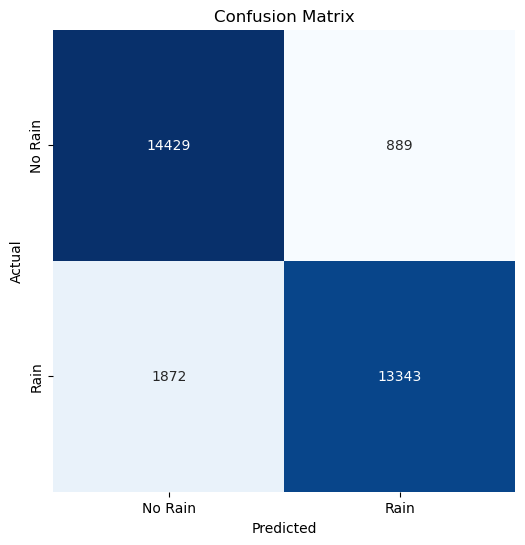

In [20]:
y_true = y_test  # Replace with your actual target values
y_pred = xgb_classifier.predict(X_test)  # Replace with your predicted target values

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()